In [6]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve,roc_curve

In [72]:
df = load_breast_cancer()
print(df.feature_names)
print()
print(df.target_names)
df
print (df.keys())
cancer = pd.DataFrame(data=df.data,columns = df.feature_names)
cancer['target'] = df.target
# cancer

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y = df.target
X = df.data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=11)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
print()



정확도: 0.9561



In [56]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score=roc_auc_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print()
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, \
    f1 score:{3:.4f}, ROC AUC:{4:.4f}'.format(accuracy,precision,recall,f1, roc_score))



get_clf_eval(y_test, pred)

오차행렬
[[36  2]
 [ 2 74]]

정확도:0.9649, 정밀도:0.9737, 재현율:0.9737,     f1 score:0.9737, ROC AUC:0.9605


In [73]:
from sklearn.model_selection import cross_val_score

dt_clf=DecisionTreeClassifier(random_state=10)
data=df.data
label=df.target
scores = cross_val_score(dt_clf, data, label, scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9035 0.9123 0.9035 0.9561 0.9027]
평균 검증 정확도: 0.9156


In [76]:
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(df.data, df.target,
                                                   test_size=0.2, random_state=11)
dt_clf = DecisionTreeClassifier()
parameters = {'max_depth':[2,3,4,5], 'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5, refit=True)
grid_dtree.fit(X_train,y_train)

print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))

estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.927473
테스트 데이터 세트 정확도: 0.9561


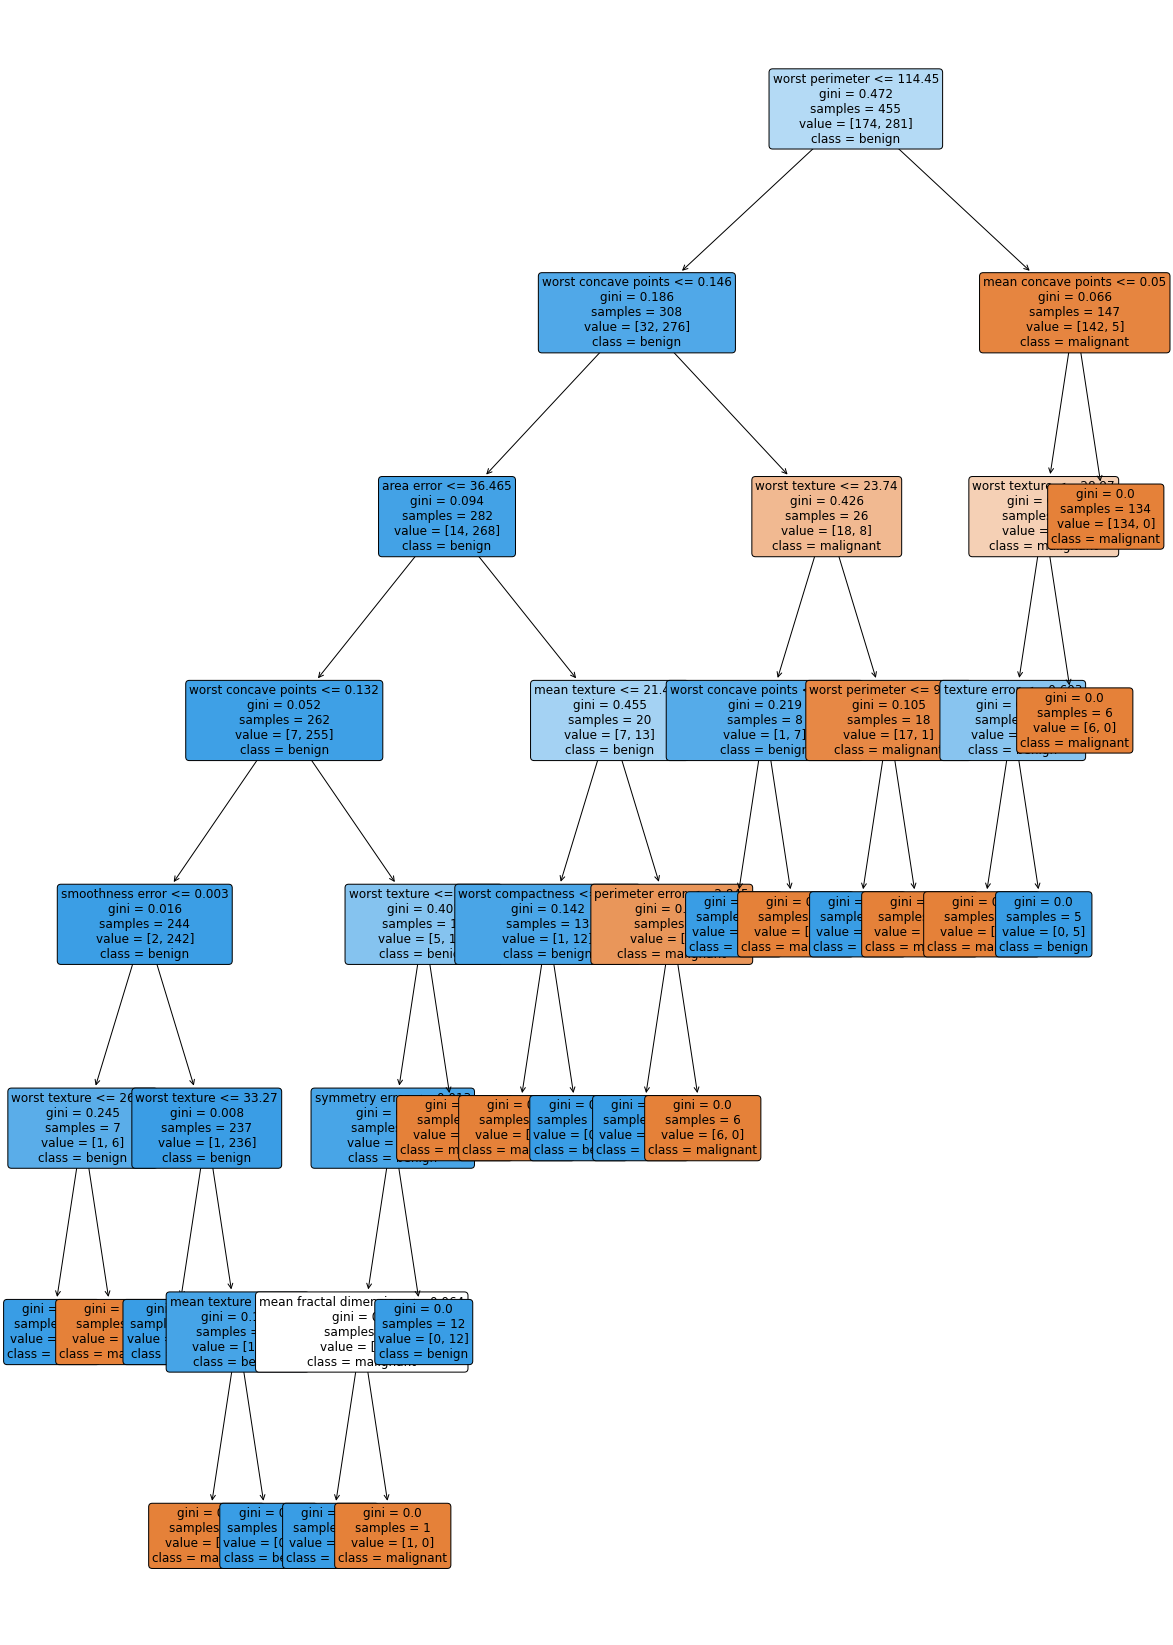

In [98]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
tree.plot_tree(dt_clf,filled=True,
              feature_names =df.feature_names,
              class_names =df.target_names,
              rounded =True , fontsize=12)
plt.show()
plt.close()

Feature importances:
[0.     0.0345 0.     0.     0.     0.     0.     0.0163 0.     0.0047
 0.     0.0133 0.008  0.0181 0.0012 0.     0.     0.     0.004  0.
 0.     0.0834 0.697  0.     0.     0.0086 0.     0.111  0.     0.    ]

mean radius: 0.0000
mean texture: 0.0345
mean perimeter: 0.0000
mean area: 0.0000
mean smoothness: 0.0000
mean compactness: 0.0000
mean concavity: 0.0000
mean concave points: 0.0163
mean symmetry: 0.0000
mean fractal dimension: 0.0047
radius error: 0.0000
texture error: 0.0133
perimeter error: 0.0080
area error: 0.0181
smoothness error: 0.0012
compactness error: 0.0000
concavity error: 0.0000
concave points error: 0.0000
symmetry error: 0.0040
fractal dimension error: 0.0000
worst radius: 0.0000
worst texture: 0.0834
worst perimeter: 0.6970
worst area: 0.0000
worst smoothness: 0.0000
worst compactness: 0.0086
worst concavity: 0.0000
worst concave points: 0.1110
worst symmetry: 0.0000
worst fractal dimension: 0.0000


<AxesSubplot:>

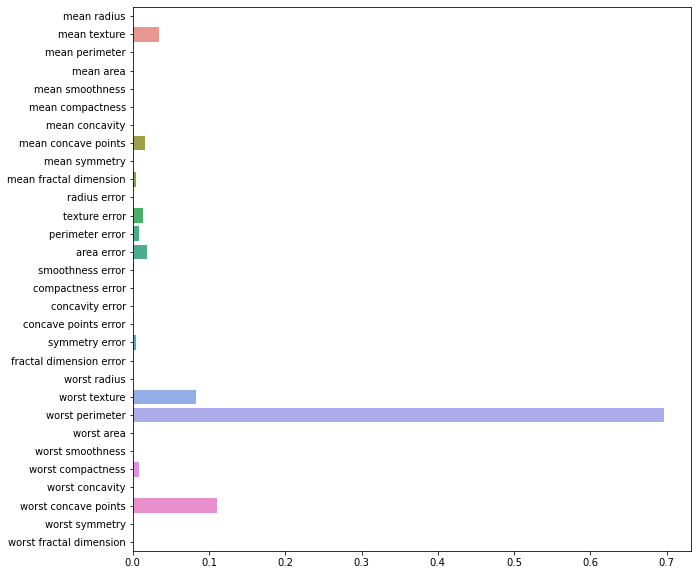

In [88]:
import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(10,10))
 # feature importance 추출(변수의 중요도)
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,4)))
 # feature별 importance 매핑
print()
for name, value in zip(df.feature_names,dt_clf.feature_importances_):
    print('{0}: {1:.4f}'.format(name,value))
    
#feature importance를 column별로 시각화    
sns.barplot(x=dt_clf.feature_importances_,y=df.feature_names)

<AxesSubplot:xlabel='worst perimeter'>

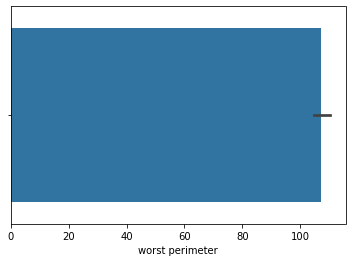

In [97]:
sns.barplot(x='worst perimeter',hue= 'target',data= cancer )